### Project 7 

In this project, you will implement the the clustering techniques that you've learned this week. 

#### Step 1: Load the python libraries that you will need for this project 

In [100]:
# REVIEW OVER PCA

In [101]:
import pandas as pd 
import matplotlib as plt
import numpy as np
import sklearn as sk 
import psycopg2 as psy

#### Step 2: Examine your data 

In [102]:
df_raw = pd.read_csv("/Users/PatrickChen/Desktop/dsi-atx-1-projects-pchen2890/project-07/assets/airport_cancellations.csv")
df_airportc= df_raw.dropna() 
df_airportc.head()

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
0,ABQ,2004.0,242.0,235.0,71.0,46.0
1,ABQ,2005.0,221.0,190.0,61.0,33.0
2,ABQ,2006.0,392.0,329.0,71.0,124.0
3,ABQ,2007.0,366.0,304.0,107.0,45.0
4,ABQ,2008.0,333.0,300.0,79.0,42.0


### Intro: Write a problem statement / aim for this project

We want to understand the behavior of flight cancellations
Answer: find what features are making delays and which airports

### Part 1: Create a PostgreSQL database 

#### 1. Let's create a database where we can house our airport data

In [103]:
# postgres -D /usr/local/pgsql/data >logfile 2>&1 
# createdb mydb

Load our csv files into tables

In [104]:
df_airportc.head()

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
0,ABQ,2004.0,242.0,235.0,71.0,46.0
1,ABQ,2005.0,221.0,190.0,61.0,33.0
2,ABQ,2006.0,392.0,329.0,71.0,124.0
3,ABQ,2007.0,366.0,304.0,107.0,45.0
4,ABQ,2008.0,333.0,300.0,79.0,42.0


Join airport_cancellations.csv and airports_operations.csv into one table

In [105]:
df_airportso = pd.read_csv("/Users/PatrickChen/Desktop/dsi-atx-1-projects-pchen2890/project-07/assets/Airport_operations.csv")
df_airportso.head()

,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,ABQ,2004,53971,53818,0.8030,0.7809,0.7921,10.38,9.89,2.43,12.10,2.46,0.83,2.55,10.87
1,ABQ,2005,51829,51877,0.8140,0.7922,0.8001,9.60,9.79,2.29,11.20,2.26,0.89,2.34,10.24
2,ABQ,2006,49682,51199,0.7983,0.7756,0.7746,10.84,9.89,2.16,12.33,2.12,0.84,2.66,11.82
3,ABQ,2007,53255,53611,0.8005,0.7704,0.7647,11.29,10.34,2.40,12.95,2.19,1.29,3.06,12.71
4,ABQ,2008,49589,49512,0.8103,0.7844,0.7875,10.79,10.41,2.41,12.32,1.82,1.03,2.79,11.48


In [106]:
df = pd.merge(df_airportso, df_airportc, left_on=['airport', 'year'], right_on=['Airport', 'Year'],how='inner')

Query the database for our intial data

In [107]:
df["% delay gate arrivals"] = 1-df["percent on-time gate arrivals"]

In [108]:
# cur = conn.cursor()
# cur.execute("""SELECT * FROM mydb""")
# ap = cur.fetchall()
# print ap

#### 1.2 What are the risks and assumptions of our data? 

### Part 2: Exploratory Data Analysis

#### 2.1 Plot and Describe the Data

In [109]:
df.describe()

,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions,% delay gate arrivals
count,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000
mean,2009.016270,113471.568210,113003.959950,0.779123,0.726958,0.766864,12.890250,13.872879,3.683292,15.703504,2.875532,1.414155,3.290826,13.428811,2009.016270,1299.314143,1341.068836,174.250313,170.256571,0.233136
std,3.150126,98059.144667,97705.308115,0.052279,0.076027,0.050502,3.036474,3.806217,2.337325,4.364217,1.169739,0.854702,0.989275,3.251647,3.150126,1840.877193,1980.459892,172.638408,229.162686,0.050502
min,2004.000000,731.000000,717.000000,0.529900,0.380800,0.513600,5.350000,7.240000,0.100000,6.290000,0.950000,0.020000,1.330000,6.330000,2004.000000,0.000000,0.000000,0.000000,0.000000,0.119700
25%,2006.000000,42064.000000,42006.500000,0.753100,0.691800,0.742150,10.830000,11.475000,2.300000,12.890000,2.035000,0.845000,2.615000,11.270000,2006.000000,349.000000,314.500000,62.000000,41.000000,0.202400
50%,2009.000000,79489.000000,79750.000000,0.784100,0.740200,0.770500,12.540000,12.940000,3.050000,15.130000,2.620000,1.140000,3.130000,12.970000,2009.000000,670.000000,653.000000,111.000000,84.000000,0.229500
75%,2012.000000,166469.500000,165560.500000,0.810700,0.773700,0.797600,14.620000,15.745000,4.220000,17.555000,3.550000,1.775000,3.815000,14.935000,2012.000000,1483.500000,1542.000000,237.000000,190.000000,0.257850
max,2014.000000,491826.000000,486799.000000,0.909700,0.897400,0.880300,25.840000,35.760000,18.940000,40.510000,7.820000,6.180000,7.520000,27.780000,2014.000000,16618.000000,17571.000000,1064.000000,1948.000000,0.486400


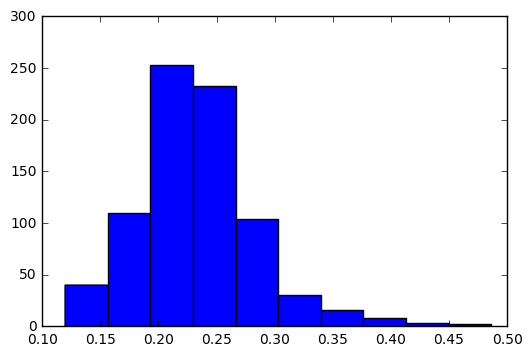

In [110]:
import matplotlib.pyplot as plt
plt.hist(df["% delay gate arrivals"])
plt.show()

#### Are there any unique values? 

In [111]:
df.airport.unique()

array(['ABQ', 'ANC', 'ATL', 'AUS', 'BDL', 'BHM', 'BNA', 'BOS', 'BUF',
       'BUR', 'BWI', 'CLE', 'CLT', 'CVG', 'DAL', 'DAY', 'DCA', 'DEN',
       'DFW', 'DTW', 'EWR', 'FLL', 'HNL', 'HOU', 'HPN', 'IAD', 'IAH',
       'IND', 'ISP', 'JAX', 'JFK', 'LAS', 'LAX', 'LGA', 'LGB', 'MCI',
       'MCO', 'MDW', 'MEM', 'MHT', 'MIA', 'MKE', 'MSP', 'MSY', 'OAK',
       'OGG', 'OMA', 'ONT', 'ORD', 'OXR', 'PBI', 'PDX', 'PHL', 'PHX',
       'PIT', 'PSP', 'PVD', 'RDU', 'RFD', 'RSW', 'SAN', 'SAT', 'SDF',
       'SEA', 'SFO', 'SJC', 'SJU', 'SLC', 'SMF', 'SNA', 'STL', 'SWF',
       'TPA', 'TUS'], dtype=object)

### Part 3: Data Mining

In [112]:
df = df.drop(["departures for metric computation","arrivals for metric computation","Airport","Year"],axis=1)
pd.DataFrame.to_csv(df,"/Users/PatrickChen/Desktop/airpot_graphs.csv")

#### 3.1 Create Dummy Variables

In [113]:
from sklearn.preprocessing import LabelEncoder
df.airport = LabelEncoder().fit_transform(df.airport)

#### 3.2 Format and Clean the Data

In [86]:
# df = df.drop(["departures for metric computation","arrivals for metric computation","Airport","Year"],axis=1)

### Part 4: Define the Data

#### 4.1 Confirm that the dataset has a normal distribution. How can you tell? 

In [114]:
from scipy.stats.mstats import normaltest
normaltest(df)

NormaltestResult(statistic=masked_array(data = [526.7425713120753 610.3537029300152 126.79779757271564 139.05046050183054
 124.98299390362925 45.271711496763956 295.0886397244487 462.20657534404324
 194.8153297466542 142.94812842981727 254.2697034367523 110.95544514222769
 135.43205182779337 677.3439637210269 672.8569818876882 336.47828022028904
 540.3288913368555 124.98299390362772],
             mask = [False False False False False False False False False False False False
 False False False False False False],
       fill_value = 1e+20)
, pvalue=array([  4.16201794e-115,   2.90654736e-133,   2.92555386e-028,
         6.39110789e-031,   7.24916038e-028,   1.47697368e-010,
         8.36211330e-065,   4.29652570e-101,   4.97036921e-043,
         9.10349823e-032,   6.10991884e-056,   8.05992905e-025,
         3.90214685e-030,   8.25328995e-148,   7.77969961e-147,
         8.60339396e-074,   4.66736795e-118,   7.24916038e-028]))

In [88]:
# from sklearn import preprocessing
# df_norm = preprocessing.normalize(df, norm='l2')

#### 4.2 Find correlations in the data

In [89]:
# average airborne delay

In [90]:
cor = pd.DataFrame(df.corr()["% delay gate arrivals"])

In [91]:
cor.sort("% delay gate arrivals",ascending=False)

/Users/PatrickChen/anaconda/envs/dsienv/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,% delay gate arrivals
% delay gate arrivals,1.000000
average gate arrival delay,0.922723
average_gate_departure_delay,0.800603
average airport departure delay,0.712975
average block delay,0.550010
average taxi out delay,0.287357
average airborne delay,0.271240
average_taxi_out_time,0.230311
Departure Cancellations,0.113363
Arrival Cancellations,0.094130


# 4.3 What is the value of understanding correlations before PCA? 

Answer: To understand which features have the greatest impact 


#### 4.4 Validate your findings using statistical analysis

#### 4.5 How can you improve your overall analysis? 

Answer: 

### Part 5: Perform a PCA and Present Findings

#### 5.1 Conduct the PCA

In [115]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Split from x and y with only values
x = df.iloc[:,1:].values
y = df.ix[:,0].values

# scale data
x_standard = StandardScaler().fit_transform(x)

In [122]:
#sklearn fastway
pcask = PCA(n_components=3)
y_sk = pcask.fit_transform(x_standard)
pcask.components_[0] #importance of each feature
pcask.explained_variance_ratio_ # the percent explained

# cumulvarExpl = np.cumsum(a)
# cumulvarExpl

array([ 0.50181623,  0.23054045,  0.08420341])

In [123]:
print y_sk

[[-2.51736823  0.09992984 -1.09406862]
 [-3.01229706 -0.17866747 -0.8815575 ]
 [-2.1682107   0.38143414 -0.43427608]
 ..., 
 [-3.77492684 -0.5058261   0.26862095]
 [-2.45864367  0.66774451  0.8427022 ]
 [-1.53629844  1.48774272  1.30598467]]


In [124]:
# create df from  PCA results
Ydf = pd.DataFrame(y_sk, columns=["PC1", "PC2", "PCA3"])

In [125]:
# creates just with airport and year column
airports = df[['airport', 'year']]

In [126]:
airports = pd.concat([airports,Ydf],axis = 1)

In [127]:
airports.head()

,airport,year,PC1,PC2,PCA3
0,0,2004,-2.517368,0.099930,-1.094069
1,0,2005,-3.012297,-0.178667,-0.881558
2,0,2006,-2.168211,0.381434,-0.434276
3,0,2007,-1.667521,0.496064,-0.375029
4,0,2008,-2.420299,0.115585,-0.119847


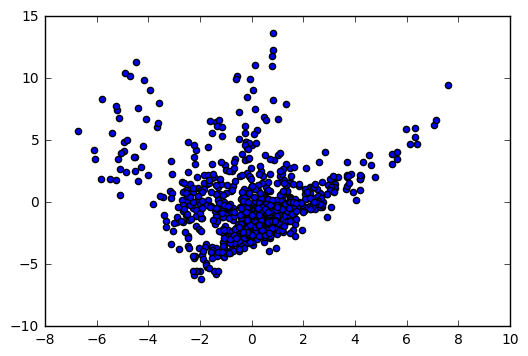

In [128]:
plt.scatter(airports.PC2, airports.PC1)
plt.show()


#### 5.2 Write an analysis plan of your findings 

Create a writeup on the interpretation of findings including an executive summary with conclusions and next steps

### Part 6: Copy your Database to AWS 

Make sure to properly document all of the features of your dataset

### Bonus: Create a 3-Dimensional Plot of your new dataset with PCA applied